In [1231]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 10)
igre = pd.read_csv("podatki_csv/igre.csv")

In [1232]:
igre = igre.sort_values("Datum")
igre['Datum'] = pd.to_datetime(igre['Datum'])

igre.reset_index()

,index,Datum,Verzija,Modra_Stran,Rdeca_Stran,Zmagovalec,Modri_Igralci,Rdeci_Igralci
0,1370,2014-01-14,3.15,Fnatic,Gambit Gaming,Fnatic,"['sOAZ', ' Cyanide', ' xPeke', ' Rekkles', ' Y...","['Darien', ' Diamond', ' Alex Ich', ' Genja', ..."
1,1369,2014-01-14,3.15,Copenhagen Wolves,Alliance,Copenhagen Wolves,"['YoungBuck', ' Amazing', ' cowTard', ' FORG1V...","['Wickd', ' Shook', ' Froggen', ' Tabzz', ' Ny..."
2,1368,2014-01-14,3.15,SUPA HOT CREW,Team ROCCAT,Team ROCCAT,"['Mimer', ' Impaler', ' Moopz', ' MrRalleZ', '...","['Xaxus', ' Jankos', ' Overpow', ' Celaver', '..."
3,1367,2014-01-14,3.15,Alliance,Fnatic,Fnatic,"['Wickd', ' Shook', ' Froggen', ' Tabzz', ' Ny...","['sOAZ', ' Cyanide', ' xPeke', ' Rekkles', ' Y..."
4,1366,2014-01-14,3.15,Gambit Gaming,Copenhagen Wolves,Gambit Gaming,"['Darien', ' Diamond', ' Alex Ich', ' Genja', ...","['YoungBuck', ' Amazing', ' cowTard', ' FORG1V..."
...,...,...,...,...,...,...,...,...
13225,7705,2024-08-03,14.14,DRX,BNK FearX,BNK FearX,"['Frog', ' Sponge', ' kyeahoo', ' Teddy', ' Pl...","['Clear', ' Raptor', ' Clozer', ' Hena', ' Duro']"
13226,7707,2024-08-03,14.14,T1,Gen.G,Gen.G,"['Zeus', ' Oner', ' Faker', ' Gumayusi', ' Ker...","['Kiin', ' Canyon', ' Chovy', ' Peyz', ' Lehen..."
13227,7708,2024-08-03,14.14,T1,Gen.G,Gen.G,"['Zeus', ' Oner', ' Faker', ' Gumayusi', ' Ker...","['Kiin', ' Canyon', ' Chovy', ' Peyz', ' Lehen..."
13228,12018,2024-08-03,14.14,Invictus Gaming,LGD Gaming,LGD Gaming,"['YSKM', ' glfs', ' neny', ' Ahn', ' Vampire']","['Burdol', ' Meteor', ' haichao', ' Shaoye', '..."


In [1233]:
#nekatere ekipe so se preimenovale, zato želim vsa njihova imena upoštevati kot eno ekipo

preimenovane_ekipe = {'SK Telecom T1':'T1',
                      'DAMWON Gaming' : 'DWG KIA',
                      'Dplus KIA' : 'DWG KIA',
                      'KSV eSports' : 'Gen.G',
                      'Samsung Galaxy' : 'Gen.G',
                      'Afreeca Freecs':'Kwangdong Freecs',
                      'DragonX' : 'DRX'
}
igre['Modra_Stran'] = igre['Modra_Stran'].replace(preimenovane_ekipe)
igre['Rdeca_Stran'] = igre['Rdeca_Stran'].replace(preimenovane_ekipe)
igre['Zmagovalec'] = igre['Zmagovalec'].replace(preimenovane_ekipe)


In [1234]:
stevilo_zmag = igre["Zmagovalec"].value_counts()

stevilo_zmag_tabela = stevilo_zmag.reset_index() 
stevilo_zmag_tabela.columns =['Ekipa', 'Zmage']

print(stevilo_zmag_tabela)

                Ekipa  Zmage
0                  T1    599
1               Gen.G    480
2       EDward Gaming    469
3              Cloud9    438
4              Fnatic    416
..                ...    ...
162          Team Aze      1
163  Taipei Assassins      1
164          INFINITY      1
165    KaBuM! Esports      1
166        DAN Gaming      1

[167 rows x 2 columns]


In [1235]:
skupno = pd.concat([igre['Modra_Stran'], igre['Rdeca_Stran']]) #zdruzimo rdeci in modri stolpec
stevilo_iger = skupno.value_counts()
stevilo_iger_tabela = stevilo_iger.reset_index() 
stevilo_iger_tabela.columns =['Ekipa', 'Odigrane_Igre']
stevilo_iger_tabela

,Ekipa,Odigrane_Igre
0,T1,895
1,EDward Gaming,763
2,Gen.G,716
3,Cloud9,710
4,Fnatic,701
...,...,...
171,Team Aze,6
172,Machi Esports,6
173,RED Canids,6
174,Taipei Assassins,6


In [1236]:
skupna = pd.merge(stevilo_zmag_tabela,stevilo_iger_tabela, on="Ekipa")
skupna['Odstotek_Zmag'] = (skupna['Zmage'] / skupna['Odigrane_Igre']) * 100
skupna['Odstotek_Zmag'] = skupna['Odstotek_Zmag'].round(2)
filtrirano = skupna[skupna['Odigrane_Igre'] >= 30]
filtrirano = filtrirano.sort_values("Odstotek_Zmag", ascending=False)
filtrirano

,Ekipa,Zmage,Odigrane_Igre,Odstotek_Zmag
1,Gen.G,480,716,67.04
0,T1,599,895,66.93
5,G2 Esports,388,606,64.03
13,JD Gaming,307,481,63.83
6,DWG KIA,388,612,63.40
...,...,...,...,...
74,Jin Air Green Wings,31,117,26.50
79,OKSavingsBank BRION,29,115,25.22
107,Team Coast,12,51,23.53
116,BRION,9,39,23.08


In [1237]:
elo_ratings = {}
zacetni = 1000
K_faktor = 32

def predviden_rezultat(rating1, rating2):
    return 1 / (1 + 10 ** ((rating2 - rating1) / 400))

def posodobi_elo(zmagovalec, porazenec):
    zmaga = predviden_rezultat(elo_ratings[zmagovalec], elo_ratings[porazenec])
    poraz = 1 - zmaga

    elo_ratings[zmagovalec] += K_faktor * (1 - zmaga) #elo se posodobi po formuli Realne točke - pričakovane točke krat K-faktor, ki je na šahovksih lestvicah ponavadi nekje med 8 in 32, tu 32 zaradi manjsega stevila iger
    elo_ratings[porazenec] += K_faktor * (0 - poraz) #0 je vrednost poraza

zgodovina = [] #da lahko narišemo grafe, beležimo zgodovino elo ocene ekip


for i, vrstica in igre.iterrows():
    ekipa1 = vrstica['Modra_Stran']
    ekipa2 = vrstica['Rdeca_Stran']
    zmagovalec = vrstica['Zmagovalec']
    if zmagovalec == ekipa1:
        luzer = ekipa2
    else:
        luzer = ekipa1
    if ekipa1 not in elo_ratings:       #preverimo, če je to prva igra od neke ekipe in jo dodamo v slovar ratingov
        elo_ratings[ekipa1] = zacetni
    if ekipa2 not in elo_ratings:
        elo_ratings[ekipa2] = zacetni
    posodobi_elo(zmagovalec, luzer)
    zgodovina.append({'Datum' : vrstica['Datum'], 'Igra': i, 'Ekipa' : ekipa1, 'Elo' : elo_ratings[ekipa1]})
    zgodovina.append({'Datum': vrstica['Datum'], 'Igra': i, 'Ekipa' : ekipa2, 'Elo' : elo_ratings[ekipa2]})

zgodovina_data = pd.DataFrame(zgodovina)
zgodovina_data = zgodovina_data.sort_values(by='Datum')

elo_ratings_data = pd.DataFrame(elo_ratings.items(), columns=['Ekipa', 'Elo'])
pd.set_option("display.max_rows", 10)

elo_ratings_data = elo_ratings_data.sort_values('Elo')
elo_ratings_data


,Ekipa,Elo
11,Team Coast,775.054767
74,Jin Air Green Wings,798.948257
137,EStar (Chinese Team),807.648813
69,Immortals,813.907507
139,SeolHaeOne Prince,821.458393
...,...,...
65,G2 Esports,1275.558786
113,Bilibili Gaming,1330.792778
128,Top Esports,1338.674828
117,Hanwha Life Esports,1343.272045


Zdaj si poglejmo graf ratinga posamezne ekipe čez čas. Pogledali bomo pot trenutno najboljse ekipe GenG.

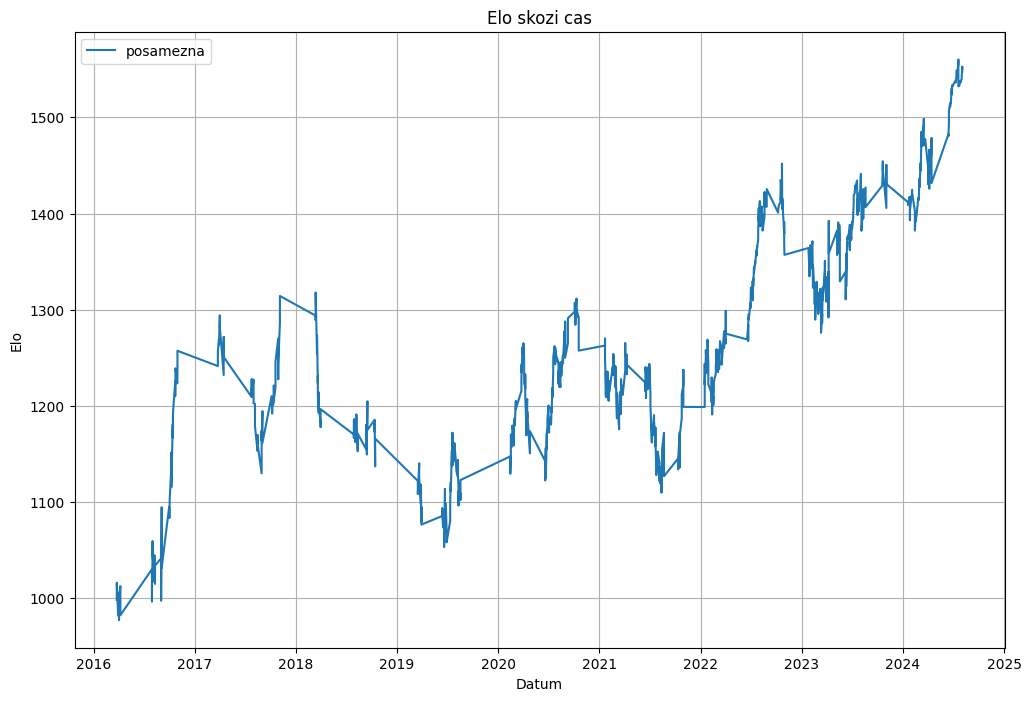

In [1238]:
import matplotlib.dates as mdates

posamezna_zgodovina = zgodovina_data[zgodovina_data['Ekipa'] == 'Gen.G']
plt.figure(figsize=(12, 8))
plt.plot(posamezna_zgodovina['Datum'], posamezna_zgodovina['Elo'], label='posamezna')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #graf je najprej na x osi vse datume označil posebej, kar je vodilo do nepreglednosti
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.xlabel('Datum')
plt.ylabel('Elo')
plt.title('Elo skozi cas')
plt.legend()
plt.grid(True)
plt.show()


Poglejmo si zdaj, ali se elo rating, ki smo ga dodelili ekipam, ujema z njihovimi odstotki zmag. Predvidevamo, da bodo ekipe z največjim odstotkom zmag imele največji elo rating.

<Axes: title={'center': 'Elo rating v odvisnosti od odstotka zmag'}, xlabel='Odstotek_Zmag', ylabel='Elo'>

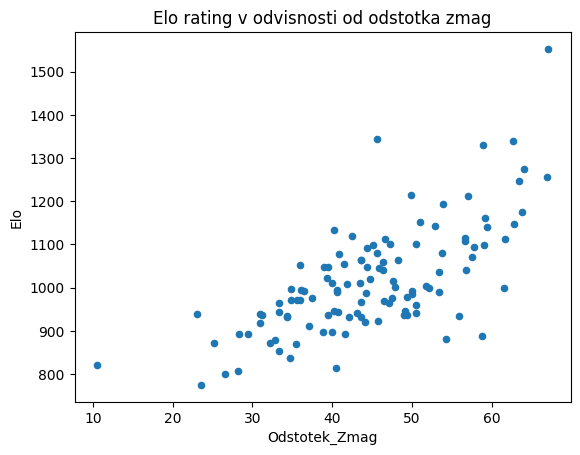

In [1239]:
skupno = pd.merge(filtrirano, elo_ratings_data, on='Ekipa')
skupno.plot.scatter(y= 'Elo', x = 'Odstotek_Zmag', title = 'Elo rating v odvisnosti od odstotka zmag')

Poglejmo si še statistike posameznih igralcev. Prav tako poglejmo, kako dolga je v povprečju njihova kariera. Ker so ešporti zelo kompetitivni, domnevamo, da bo dokaj kratka.

<Axes: xlabel='Zaokrozene_Igre'>

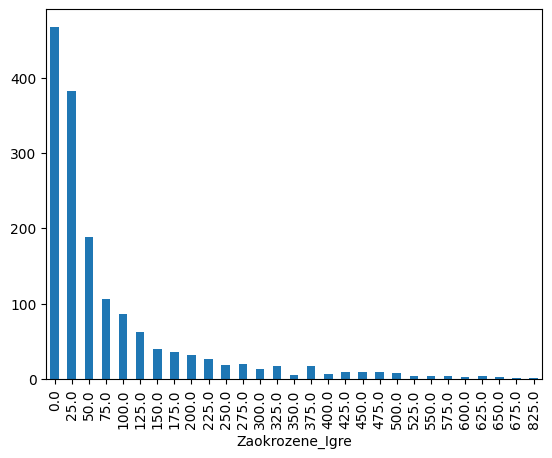

In [1240]:
igralci = {}
for i, vrstica in igre.iterrows():
    igralci1 = eval(vrstica['Modri_Igralci']) #ker igralci v panda data framu niso bili shranjeni kot list ampak kot string
    igralci1 = [igralec.strip() for igralec in igralci1]
    igralci2 = eval(vrstica['Rdeci_Igralci'])
    igralci2 = [igralec.strip() for igralec in igralci2]

    for igralec in igralci1:
        if not igralec in igralci:
            if vrstica['Zmagovalec'] == vrstica['Modra_Stran']:
                igralci[igralec] = {'Igre' : 1, 'Zmage' : 1}
            else:
                igralci[igralec] = {'Igre' : 1, 'Zmage' : 0}
        else:
            if vrstica['Zmagovalec'] == vrstica['Modra_Stran']:
                igralci[igralec]['Igre'] += 1
                igralci[igralec]['Zmage'] += 1
            else:
                igralci[igralec]['Igre'] += 1
    for igralec in igralci2:
        if not igralec in igralci:
            if vrstica['Zmagovalec'] == vrstica['Rdeca_Stran']:
                igralci[igralec] = {'Igre' : 1, 'Zmage' : 1}
            else:
                igralci[igralec] = {'Igre' : 1, 'Zmage' : 0}
        else:
            if vrstica['Zmagovalec'] == vrstica['Rdeca_Stran']:
                igralci[igralec]['Igre'] += 1
                igralci[igralec]['Zmage'] += 1
            else:
                igralci[igralec]['Igre'] += 1
igralci_data = pd.DataFrame(igralci).T.reset_index()
igralci_data.columns = ['Igralec', 'Igre', 'Zmage']

def zaokrozi(x, baza):
    return baza * round(x / baza)

igralci_data['Zaokrozene_Igre'] = zaokrozi(igralci_data['Igre'], 25)

igralci_kariere = igralci_data.groupby('Zaokrozene_Igre').size() 
igralci_kariere.plot.bar()


In [1241]:
igralci_data_f = igralci_data[igralci_data['Igre'] >= 50]

igralci_data_f['Odstotek_Zmag'] = igralci_data_f['Zmage'] / igralci_data_f['Igre'] * 100
igralci_data_f = igralci_data_f.sort_values("Odstotek_Zmag", ascending=False)
igralci_data_f




/var/folders/xs/4t9mxpt11fgczvx6bc0zc_7h0000gn/T/ipykernel_84793/1451048218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igralci_data_f['Odstotek_Zmag'] = igralci_data_f['Zmage'] / igralci_data_f['Igre'] * 100


,Igralec,Igre,Zmage,Zaokrozene_Igre,Odstotek_Zmag
299,meiko,50,41,50.0,82.000000
1432,Peyz,208,162,200.0,77.884615
166,ClearLove,87,65,75.0,74.712644
207,PawN,194,141,200.0,72.680412
103,Koro1,203,144,200.0,70.935961
...,...,...,...,...,...
1342,vital,54,12,50.0,22.222222
875,Uniboy,55,12,50.0,21.818182
1259,NUCLEARINT,54,10,50.0,18.518519
795,Grace,55,10,50.0,18.181818
